In [61]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style='dark')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

# 1. Reading and understanding the data variables


In [35]:
# Load the data into pandas dataframe
bike = pd.read_csv('day.csv')

In [36]:
# Overview of kind of data we are dealing with
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [37]:
bike.shape

(730, 16)

In [38]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [39]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dealing with missing values if any

In [40]:
# Finding percentage of missing values in each column
bike.isnull().sum() * 100 / len(bike)


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Observation: **No missing** values in data

#### Observation: dteday column is of object type and it has datetime values in **%d-%m-%Y** format

In [41]:
# Converting the dteday column to datetime type
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%d-%m-%Y')


In [42]:
bike.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [43]:
# Extracting year and month from 'dteday' column
dt_indexer = pd.DatetimeIndex(bike['dteday'])
bike['year'] = dt_indexer.year
bike['month'] = dt_indexer.month

In [44]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


#### Dealing with **redundant** columns

In [45]:
# Dropping redundant variable 'holiday' as 'workingday' could be used to infer the holiday info
# Dropping 'dteday' column as the year and month is extracted from it and it would not be used further
# Dropping 'instant' column as it is just the sequence
# Dropping 'casual' as this is redundant info as it can be infered from 'registered' column
# Dropping 'yr' and 'mnth' as the actual year and month is already extracted from dteday
bike = bike.drop(columns=['holiday', 'dteday', 'instant', 'casual', 'yr', 'mnth'], axis=1)

In [46]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,654,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,670,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1454,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1518,1600,2018,1


In [47]:
# - cnt: count of total rental bikes including both casual and registered
# - hum: humidity

# Renaming the cnt and hum columns based on the data dictionary info for better labels 

bike = bike.rename(columns={'cnt': 'bike_count', 'hum': 'humidity'})

In [48]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,registered,bike_count,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,654,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,670,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1454,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1518,1600,2018,1


# 2.  Encoding and Viewing the data
#### As mentioned in Data Preparation of Problem statement, checking for weathersit and season column values

### **1. Season and Weathersit**

 season (1:spring, 2:summer, 3:fall, 4:winter)

 weathersit : 
 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [49]:
# Check the unique values and infer the labels from data dictionary
print( f"weathersit : { bike['weathersit'].unique()}")
print( f"season : { bike['season'].unique()}")

weathersit : [2 1 3]
season : [1 2 3 4]


In [50]:
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['weathersit'] = bike['weathersit'].map({1:'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})

In [51]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,registered,bike_count,year,month
0,spring,6,0,Mist,14.110847,18.18125,80.5833,10.749882,654,985,2018,1
1,spring,0,0,Mist,14.902598,17.68695,69.6087,16.652113,670,801,2018,1
2,spring,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1229,1349,2018,1
3,spring,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1454,1562,2018,1
4,spring,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1518,1600,2018,1


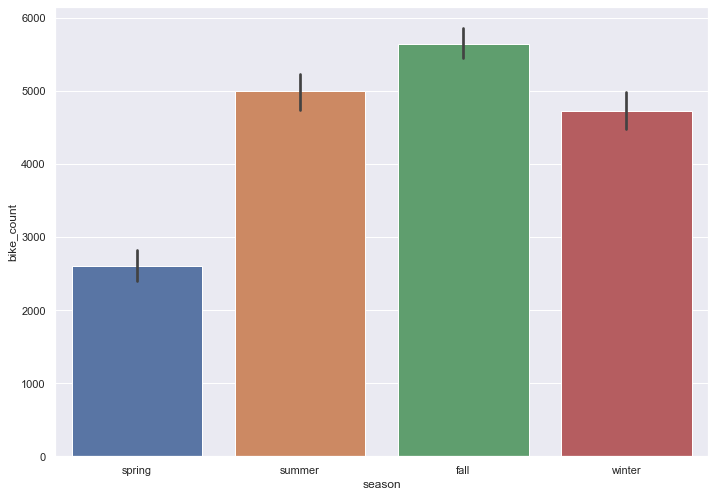

In [62]:
sns.barplot(x='season', y='bike_count', data=bike, )



#### Bike is rented more during **fall** season

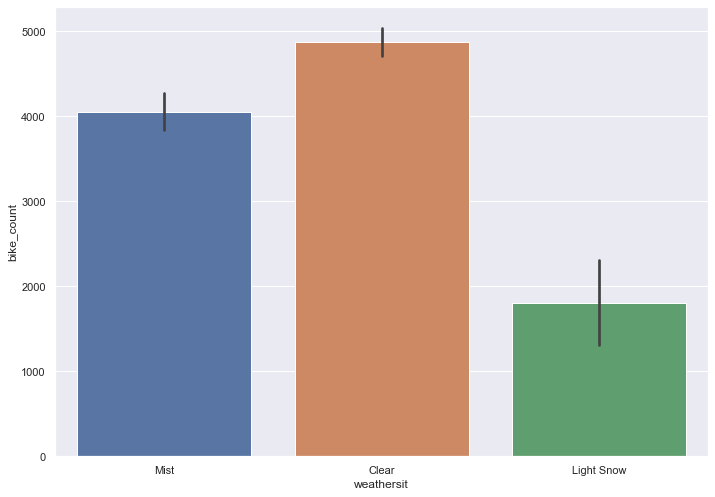

In [63]:
sns.barplot(x='weathersit', y='bike_count', data=bike)

#### Bike is rented more on **Clear: Few clouds, Partly cloudy** weather situation

### **2. workingday**
    if day is neither weekend nor holiday is 1, otherwise is 0.

In [64]:
bike['workingday'] = bike['workingday'].map({1:'working_day',0:'Holiday'})

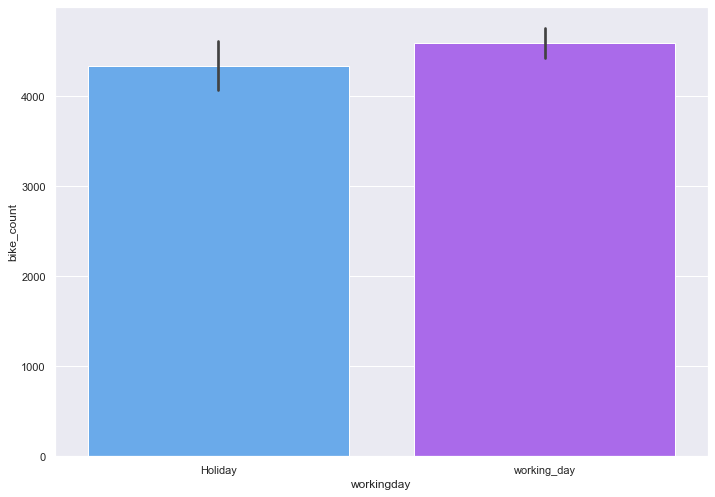

In [67]:
sns.barplot('workingday','bike_count',data=bike,palette='cool')

**working_day** seem to attract more bike riders compared to 'Holiday'.\
could be due to commute **Office in Bike**

### **3. year**
year (0: 2018, 1:2019)

In [68]:
bike['year'] = bike['year'].map({2018:0, 2019:1})

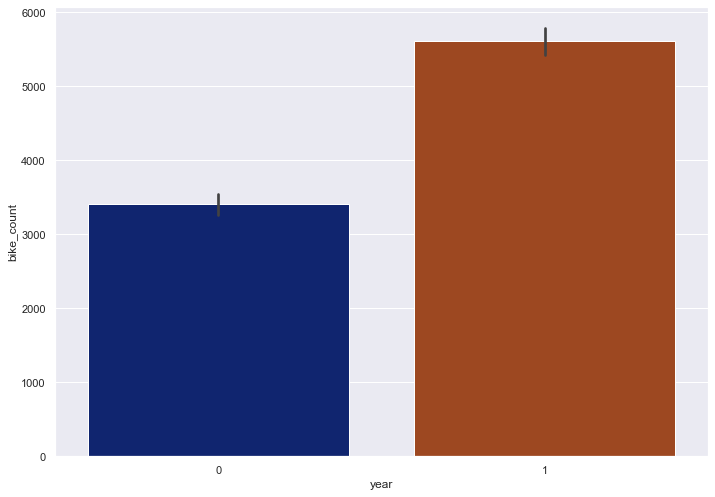

In [70]:
sns.barplot('year','bike_count',data=bike,palette='dark')

#### Bike is used more on **2019** compared with 2018

### **4. Month**

1:Jan
2:Feb
3:Mar
4:Apr
5:May
6:June
7:July
8:Aug
9:Sep
10:Oct
11:Nov
12:Dec

In [71]:
bike['month'] = bike['month'].map({1: 'Jan', 2: 'Feb', 3: 'March', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

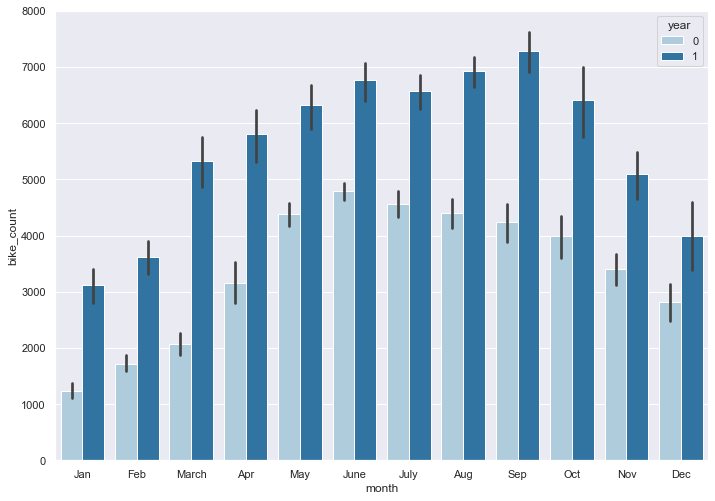

In [75]:

sns.barplot('month','bike_count',hue='year',data=bike,palette='Paired')

#### **5. WeekDay**
0:Mon
1:Tue
2:Wed
3:Thu
4:Fri
5:Sat
6:Sun

In [76]:
bike['weekday'] = bike['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

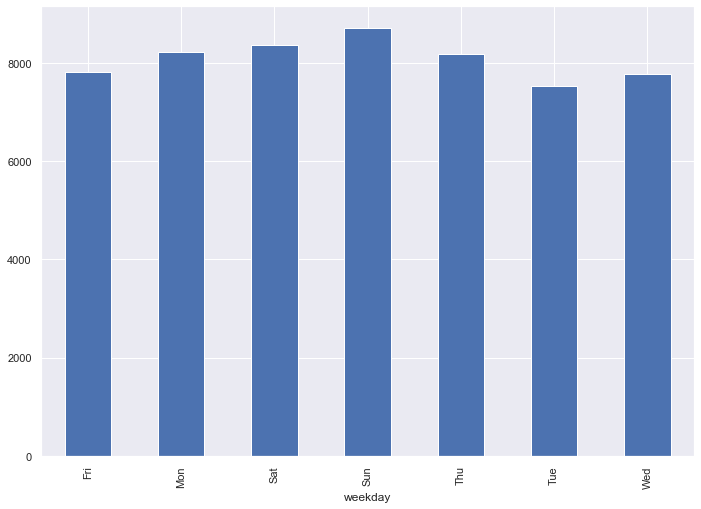

In [78]:
bike.groupby('weekday')['bike_count'].max().plot(kind='bar')

### **Sunday** has the maximum bike 

#### **6. Temp**


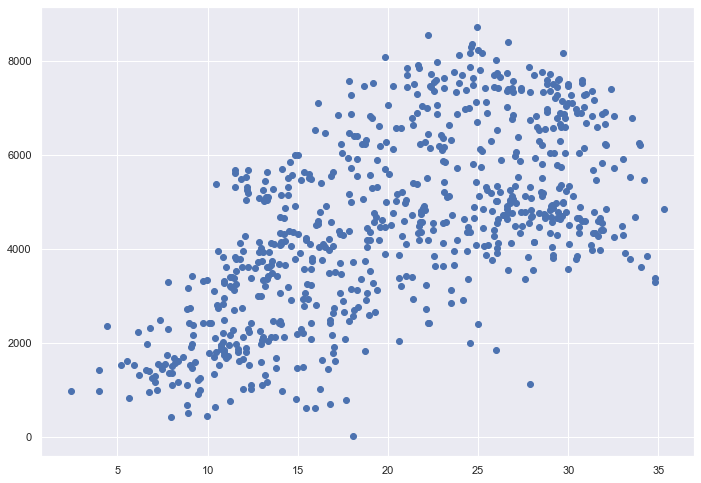

In [80]:
plt.scatter('temp','bike_count',data=bike)

### Bike rentals are happned at **Higher** temp

#### **7. atemp**

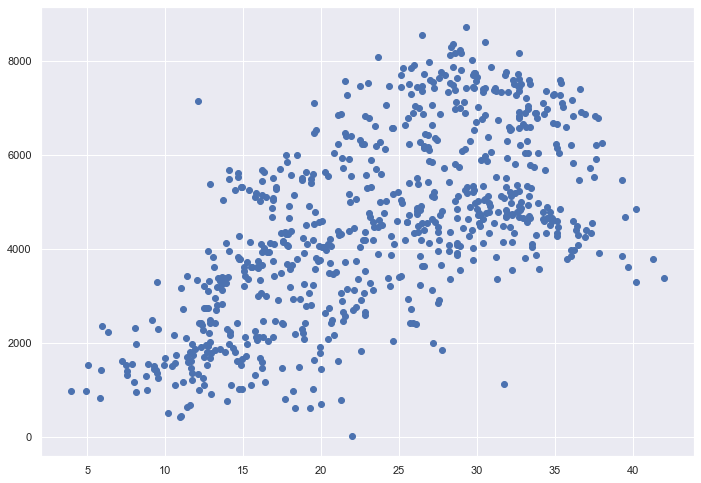

In [82]:
plt.scatter('atemp','bike_count',data=bike)

### Bike rentals are happned at **Higher** temp

#### **8. Windspeed**

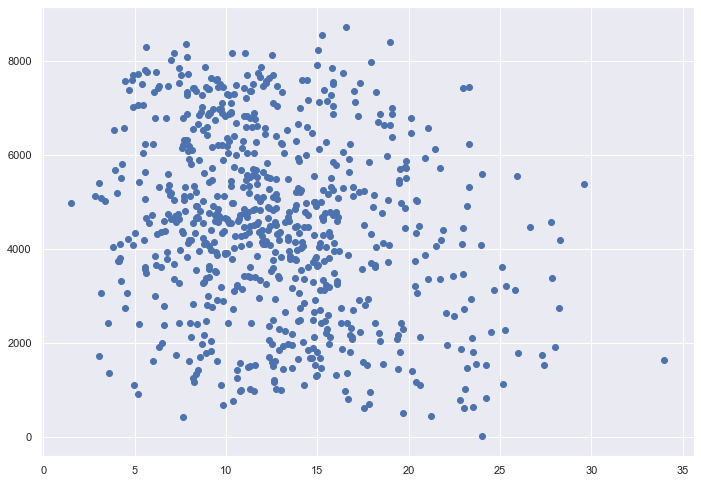

In [83]:
plt.scatter('windspeed','bike_count',data=bike)

#### **9. Humidity**

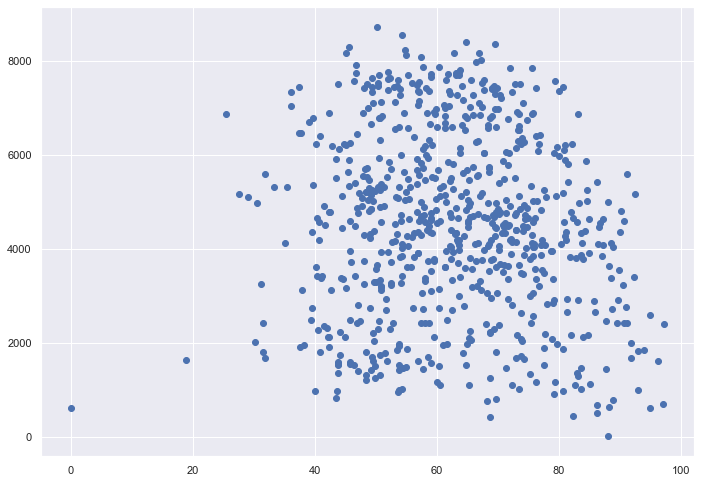

In [85]:
plt.scatter('humidity','bike_count',data=bike)

### Bike rentals are happned at **High** Humidity

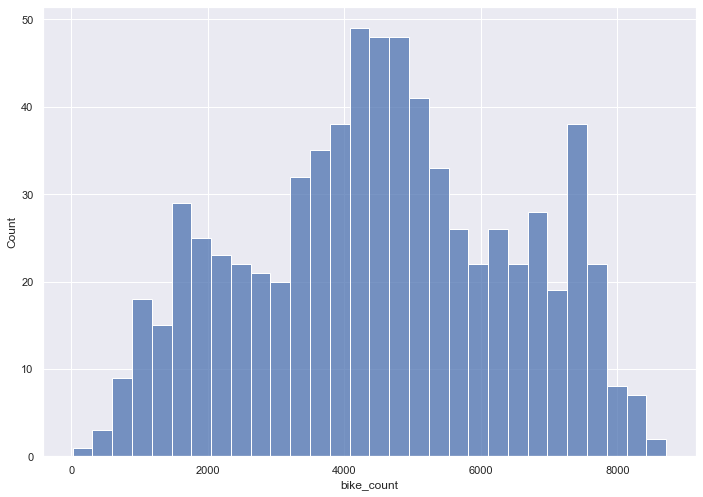

In [93]:
sns.histplot(bike['bike_count'], bins=30)

# 3. Multicollinearity Check

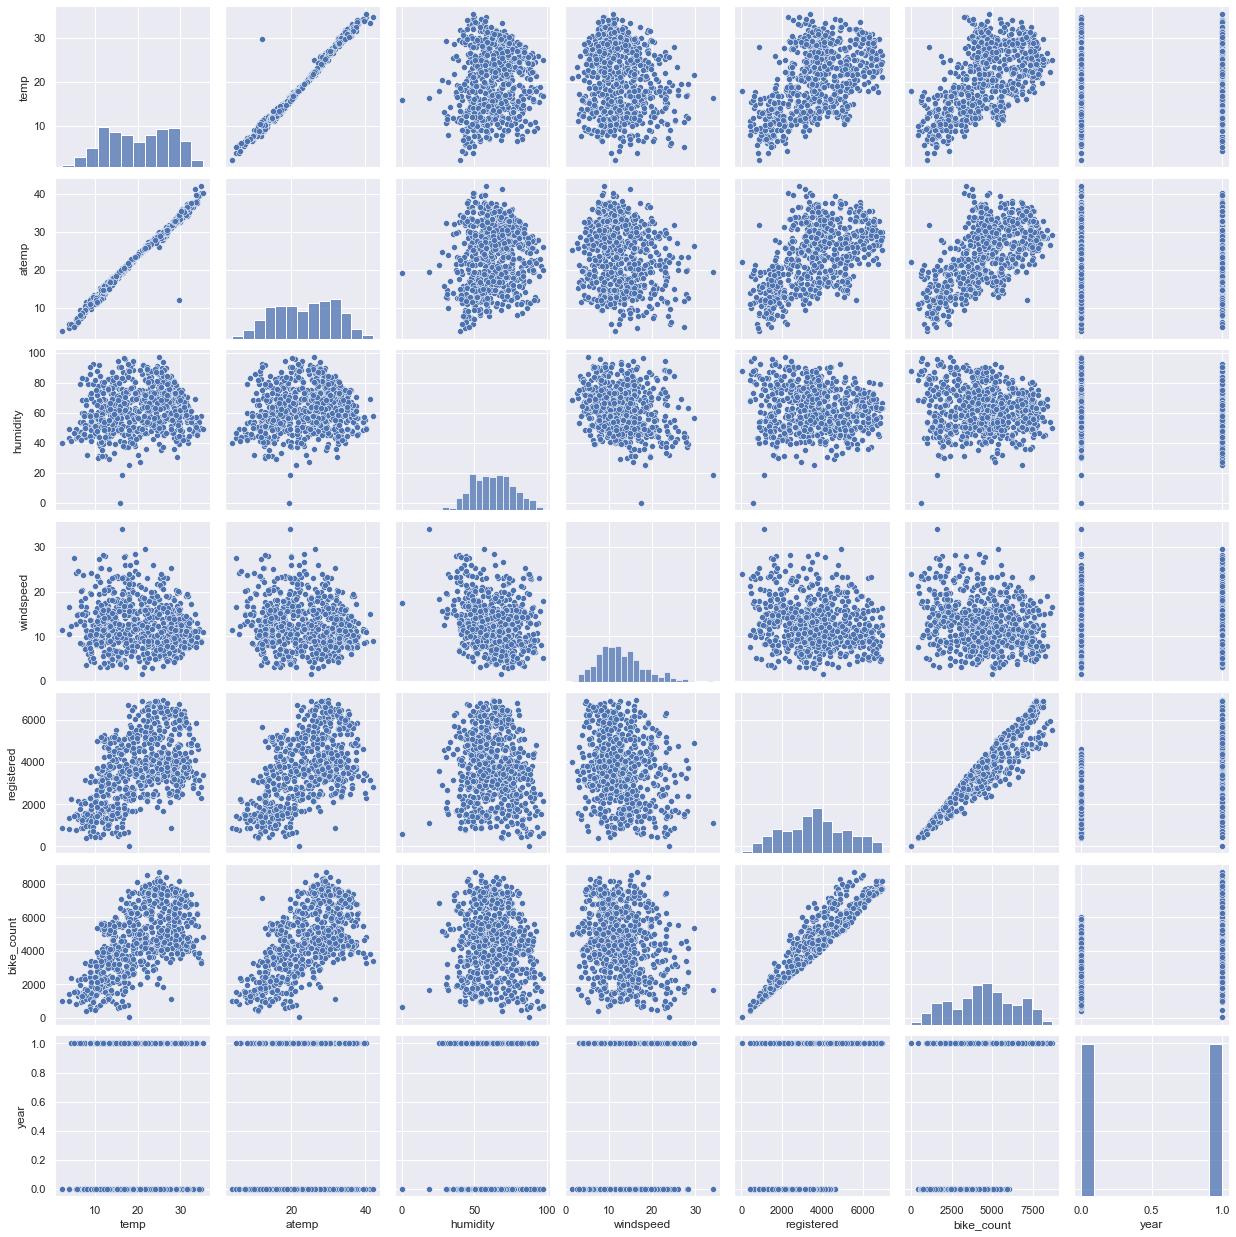

In [94]:
sns.pairplot(bike)

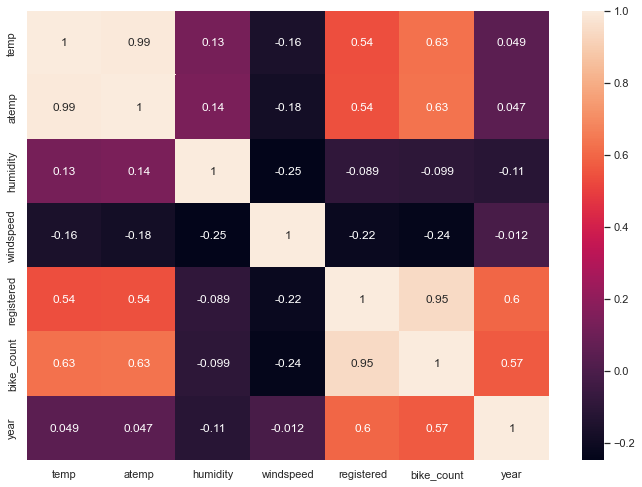

In [96]:
sns.heatmap(bike.corr(),annot=True)

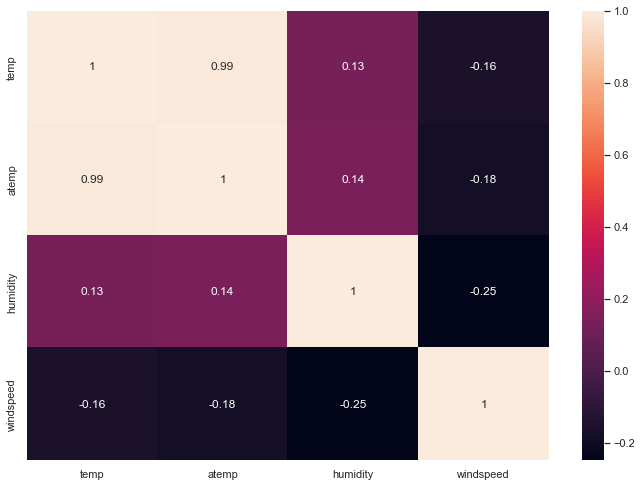

In [97]:
data= bike[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)

#### Observation: **atemp and temp are highly correlated**, so one of it can be dropped

In [98]:
bike = bike.drop(columns=['atemp'], axis=1)

In [99]:
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,registered,bike_count,year,month
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,654,985,0,Jan
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,670,801,0,Jan
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1229,1349,0,Jan
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1454,1562,0,Jan
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1518,1600,0,Jan


# 4. Dealing With Categorical Variables

In [101]:
seasons = pd.get_dummies(bike['season'],drop_first=True)

working_day = pd.get_dummies(bike['workingday'],drop_first=True)

weather= pd.get_dummies(bike['weathersit'],drop_first=True)

month= pd.get_dummies(bike['month'],drop_first=True)

week_day= pd.get_dummies(bike['weekday'],drop_first=True)

bike= pd.concat([bike,seasons,working_day,weather,month,week_day],axis=1)

In [102]:
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,registered,bike_count,year,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,654,985,0,...,0,0,0,0,0,0,1,0,0,0
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,670,801,0,...,0,0,0,0,1,0,0,0,0,0
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1229,1349,0,...,0,0,0,0,0,0,0,0,1,0
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1454,1562,0,...,0,0,0,0,0,0,0,0,0,1
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1518,1600,0,...,0,0,0,0,0,0,0,1,0,0


In [124]:
bike = bike.drop(['season','workingday','weathersit','weekday','month'],axis=1)

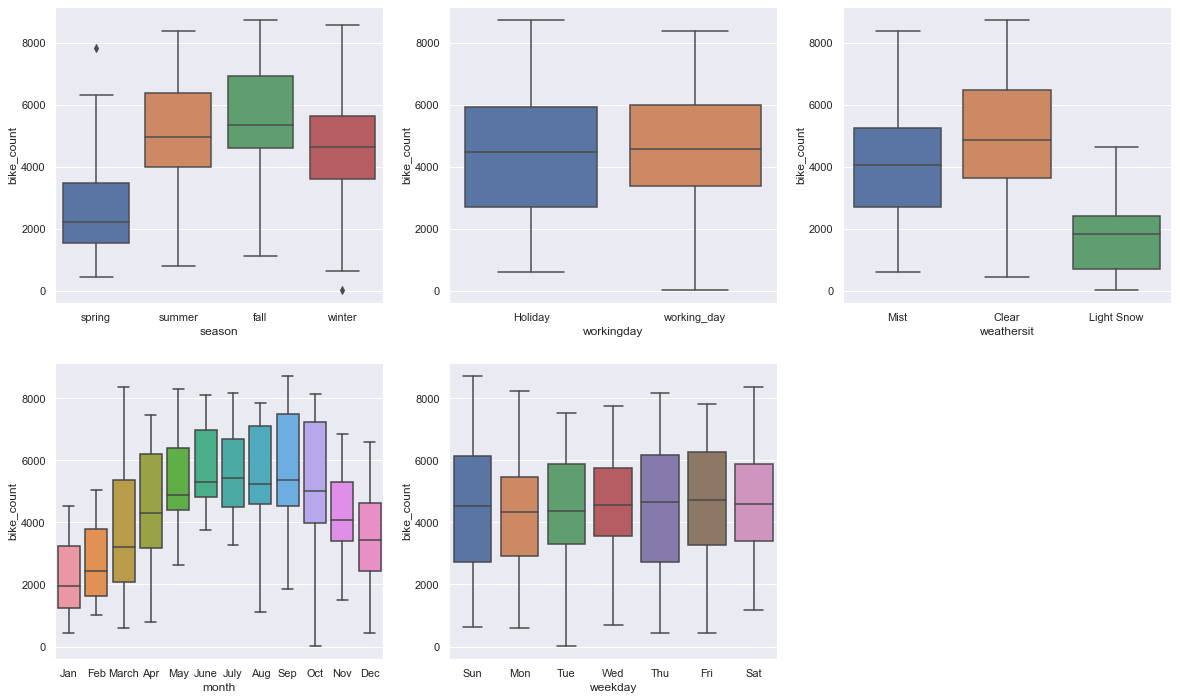

In [104]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'bike_count', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'bike_count', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'bike_count', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'month', y = 'bike_count', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'bike_count', data = bike)
plt.show()

#### Observations:
1. Season: **spring season has the lowest** bike rent count whereas **fall season has the maximum** bike rents
2. working day: Bike rents were **low during the holidays**
3. weather Sit: Rents were **high during the Clear weather** and low during the 'Light Snow'
4. month: **September month has high rentals** while October has the lowest
5. weekday: **Weekends have significant increase in rentals**

# 5. Splitting Data into Training and Testing Sets

In [125]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [126]:
# Re scaling the features
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [127]:
num_vars=['temp','humidity','windspeed','bike_count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [128]:
df_train.head()

,temp,humidity,windspeed,registered,bike_count,year,spring,summer,winter,working_day,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,-0.121335,-0.514725,-0.117752,6612,1.562685,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
576,1.231731,0.516433,-0.330615,6248,1.399629,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
426,-0.420478,-0.069854,-0.385694,3110,-0.215554,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,-1.294913,-1.045032,2.018143,1432,-1.379511,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,-0.627580,-1.000840,-0.779889,3100,-0.136589,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


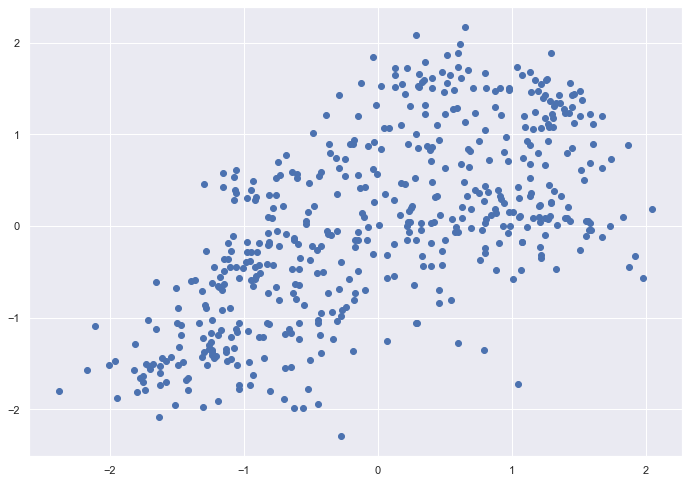

In [129]:
plt.scatter('temp','bike_count',data=df_train)

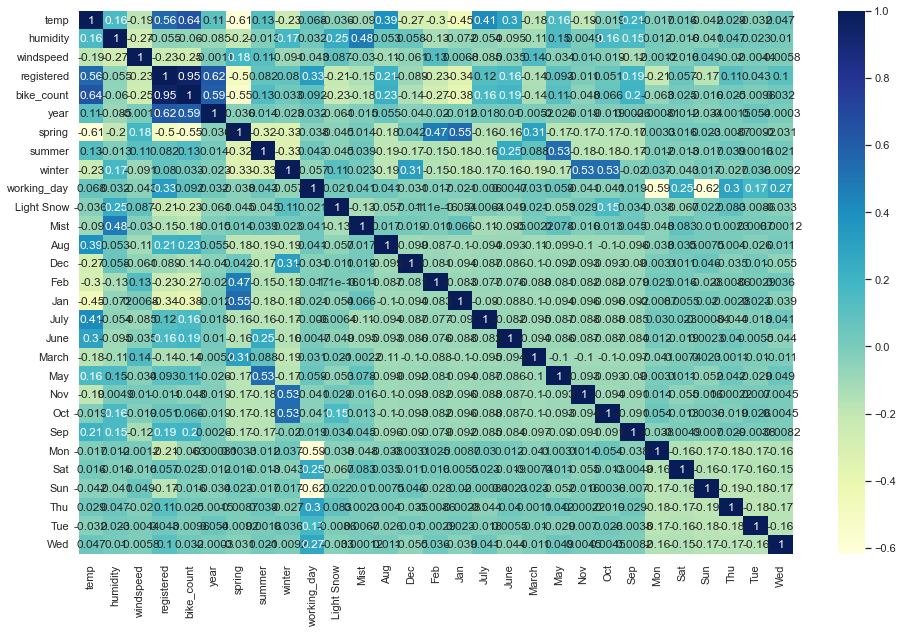

In [130]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [131]:
y_train = df_train.pop('bike_count')
X_train = df_train

# 6. Building Linear model

In [132]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [133]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) 
rfe = rfe.fit(X_train, y_train)


In [134]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('registered', False, 19),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('March', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thu', False, 16),
 ('Tue', False, 12),
 ('Wed', False, 13)]

In [135]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [136]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [137]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [138]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [139]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bike_count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.30e-179
Time:                        16:12:51   Log-Likelihood:                -285.08
No. Observations:                 510   AIC:                             592.2
Df Residuals:                     499   BIC:                             638.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6092      0.122     -4.974      0.000      -0.850      -0.369
temp            0.3984      0.027     14.773      0.000       0.345       0.451
year            1.0451      0.038     27.326      0.000       0.970       1.120
spring         -0.6819      0.056    -12.116      0.000      -0.792      -0.571
working_day     0.4421      0.122      3.633      0.000       0.203       0.681
Light Snow     -1.3226      0.114    -11.586      0.000      -1.547      -1.098
Mist           -0.3671      0.041     -8.999      0.000      -0.447      -0.287
July           -0.3011      0.081     -3.734      0.000      -0.460      -0.143
Sep             0.2845      0.073      3.900      0.000       0.141       0.428
Mon             0.2462      0.129      1.902      0.058      -0.008       0.500
Sun             0.4841      0.129      3.762      0.000       0.231       0.737
==============================================================================
Omnibus:                       59.973   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.538
Skew:                          -0.597   Prob(JB):                     4.57e-34
Kurtosis:                       5.408   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping Mon as it is insignificant


In [140]:
X_train1= X_train_rfe.drop('Mon',1)

In [141]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [142]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bike_count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.22e-179
Time:                        16:14:45   Log-Likelihood:                -286.92
No. Observations:                 510   AIC:                             593.8
Df Residuals:                     500   BIC:                             636.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4002      0.054     -7.374      0.000      -0.507      -0.294
temp            0.3999      0.027     14.797      0.000       0.347       0.453
year            1.0458      0.038     27.273      0.000       0.970       1.121
spring         -0.6842      0.056    -12.129      0.000      -0.795      -0.573
working_day     0.2327      0.052      4.476      0.000       0.131       0.335
Light Snow     -1.3185      0.114    -11.522      0.000      -1.543      -1.094
Mist           -0.3647      0.041     -8.922      0.000      -0.445      -0.284
July           -0.2972      0.081     -3.676      0.000      -0.456      -0.138
Sep             0.2757      0.073      3.777      0.000       0.132       0.419
Sun             0.2749      0.067      4.102      0.000       0.143       0.407
==============================================================================
Omnibus:                       62.219   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.183
Skew:                          -0.617   Prob(JB):                     1.65e-35
Kurtosis:                       5.452   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation: Now we have all the variables with **p-value less than 0.05**.

In [143]:
X_train_new= X_train2.drop('const',axis=1)

Variance Inflation Factor(VIF)

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.28
0,temp,2.02
2,spring,2.02
1,year,1.80
5,Mist,1.50
6,July,1.35
8,Sun,1.28
7,Sep,1.17
4,Light Snow,1.06


#### All the variables have **VIF less than 5**

# 7. Residual Analysis of the train data

In [145]:
y_train_pred = lm1.predict(X_train2)

Text(0.5, 0, 'Errors')

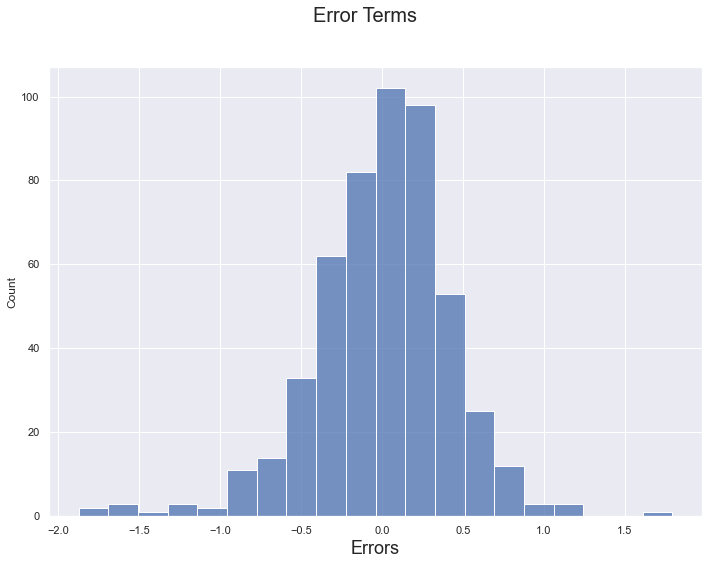

In [147]:
fig = plt.figure()
sns.histplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### **Assumptions of Linear Regression:**
1. The error terms are normally distributed.
2. The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
3. The predicted values have linear relationship with the actual values

# 8. Making Predictions

In [149]:
num_vars=['temp','humidity','windspeed','bike_count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [151]:
y_test = df_test.pop('bike_count')
X_test = df_test

In [152]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [153]:
y_test_pred = lm1.predict(X_test_new)

# 9. Model Evaluation

Text(0, 0.5, 'Predictions')

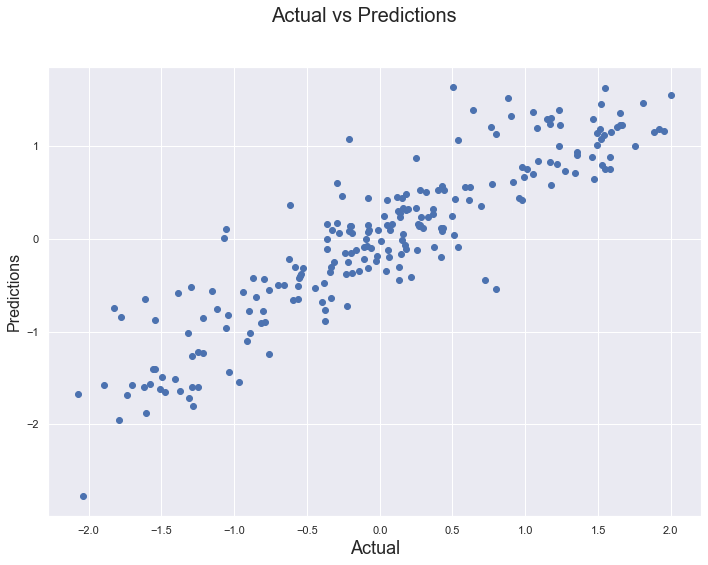

In [154]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)

In [155]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8075114920782749

Conclusion:
The top 5 variables effecting and benefitting the Bike Rental count are:

1. Spring season : -0.6842
2. Temperature : 0.3999
3. Mist : -0.3647
4. Sun : 0.2749
5. working_day : 0.2327